<a href="https://colab.research.google.com/github/Eduardo681/datascienceprojects/blob/main/MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MKT***
Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

# **Importação das bibliotecas e base de dados**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
creditcard_df = pd.read_csv('/content/Mkt_Data.csv')

In [4]:
creditcard_df.shape

(8950, 18)

In [5]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **Vizualização e exploração de dados**



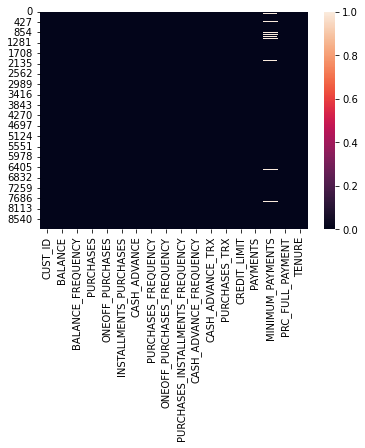

In [8]:
sns.heatmap(creditcard_df.isnull());

In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [11]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [12]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [13]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [14]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

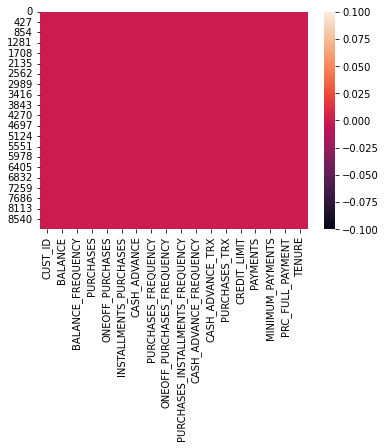

In [15]:
sns.heatmap(creditcard_df.isnull());

In [16]:
creditcard_df.duplicated().sum()

0

In [17]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [18]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

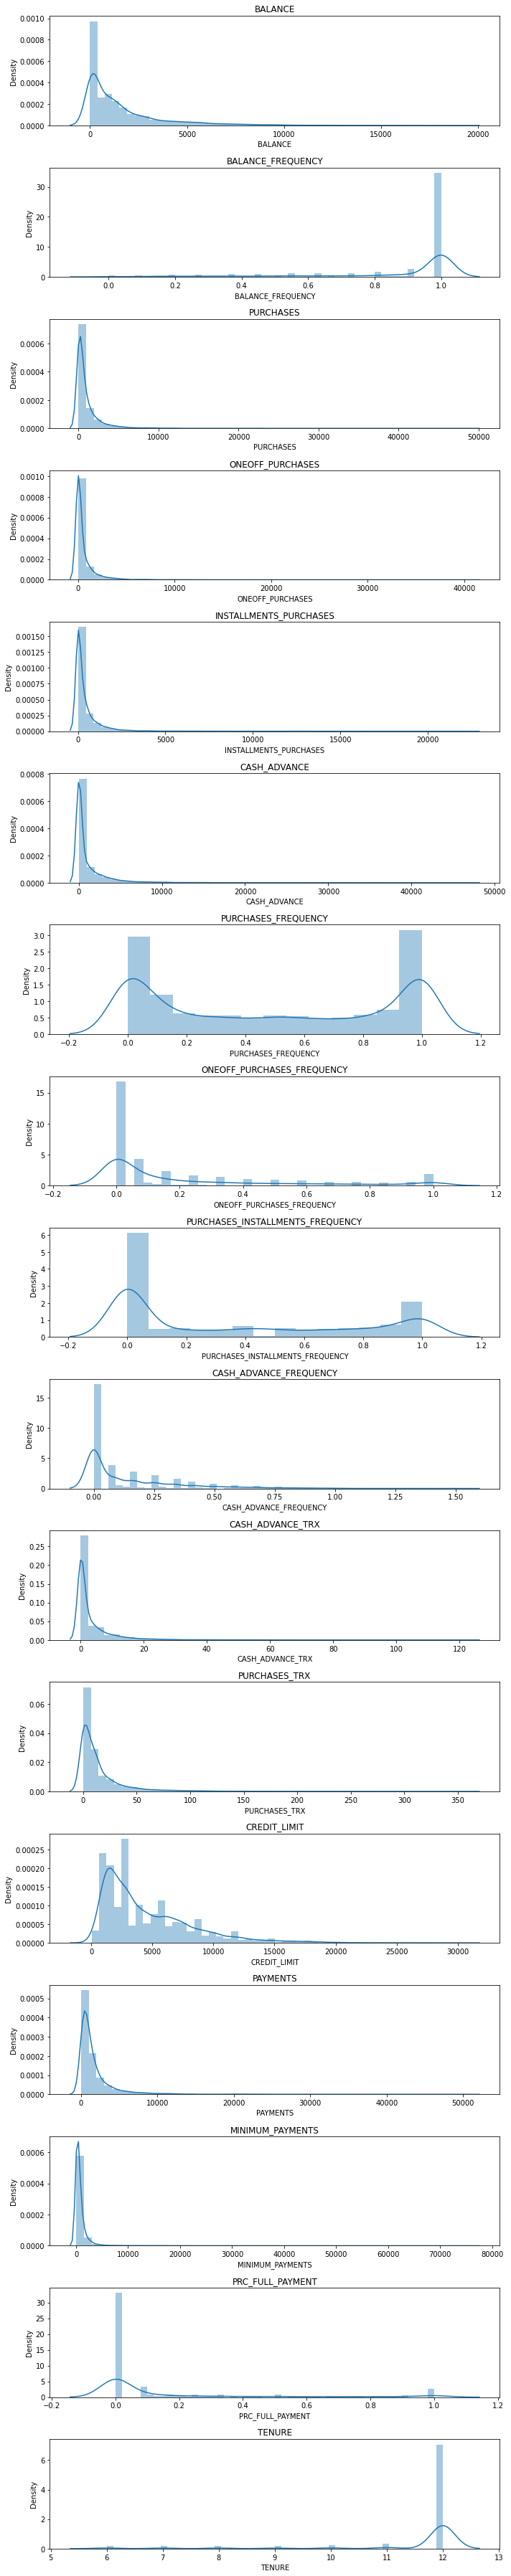

In [20]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]])
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [21]:
correlations = creditcard_df.corr()

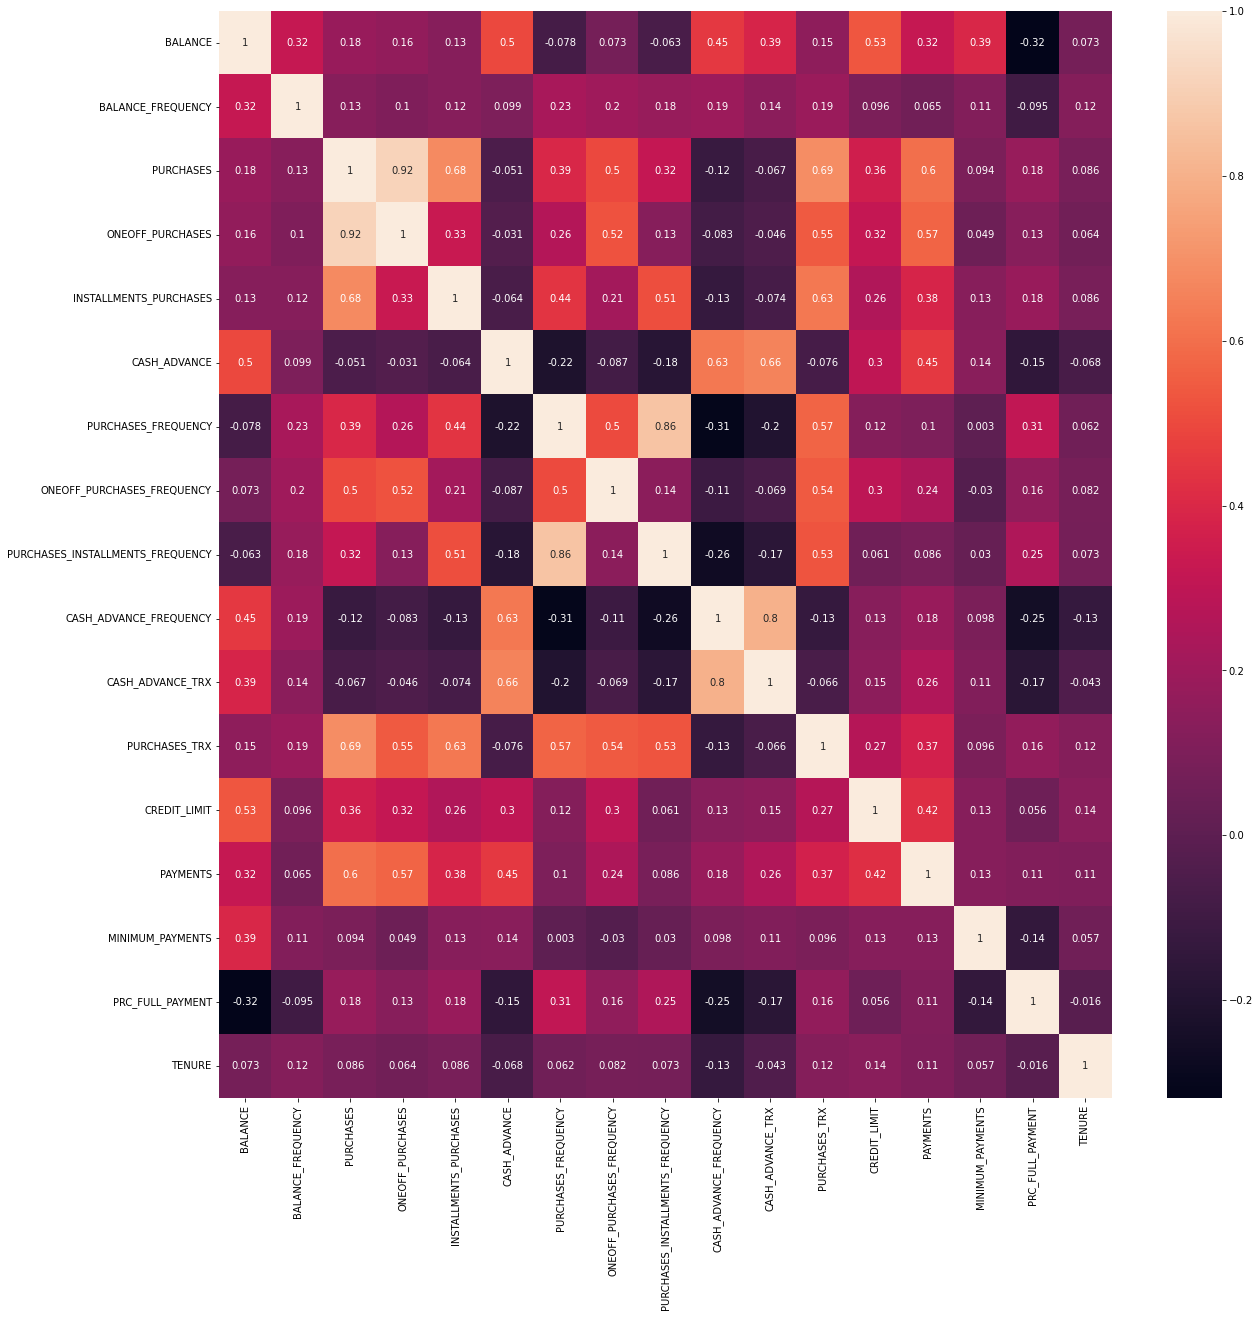

In [22]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)

# **Definição do número de clusters**

In [23]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [24]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [26]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [27]:
print(wcss_1)

[152149.99999999983, 127784.9381662719, 111986.69806610125, 99073.93826774803, 91503.39081843363, 84852.59400226288, 79756.46348305946, 74491.09892312337, 71585.85740492138, 66610.76869929383, 63633.40529833801, 61401.565975107704, 59638.9425004504, 57498.78292554236, 55897.963772932446, 54268.9077720886, 53029.765464763295, 51610.29441139912, 50633.78716653692]


Text(0, 0.5, 'WCSS')

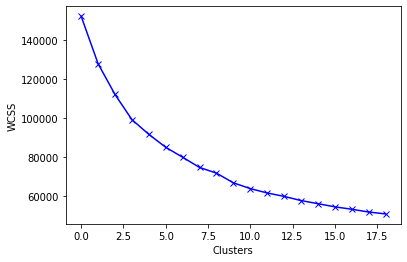

In [28]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

# **Agrupamento**

In [29]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [30]:
labels

array([7, 4, 2, ..., 5, 5, 5], dtype=int32)

In [31]:
len(labels)

8950

In [32]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 674,   54, 2711,   30,  880,  637, 1197, 2767]))

In [33]:
kmeans.cluster_centers_

array([[ 5.59074806e-01,  4.58751703e-01,  1.85209414e+00,
         1.59323771e+00,  1.45215906e+00, -2.37711687e-01,
         1.15360981e+00,  1.80149005e+00,  9.79546207e-01,
        -3.48400243e-01, -2.59961951e-01,  2.16554135e+00,
         1.13789300e+00,  1.00757216e+00,  1.25117650e-01,
         4.46356011e-01,  3.10789554e-01],
       [ 1.10976065e+00,  4.68337266e-01, -1.23905989e-01,
        -2.95654596e-01,  2.49587453e-01, -3.45563352e-02,
        -9.62031071e-02, -5.57800600e-01,  1.40950246e-01,
        -1.43234944e-01, -3.91756938e-02,  3.77496748e-02,
        -1.05358778e-01, -1.19853515e-01,  9.50995781e+00,
        -5.20274752e-01,  2.91490546e-01],
       [-3.41583791e-01,  3.56233419e-01,  4.45674135e-02,
        -7.40177793e-02,  2.41065373e-01, -3.67726990e-01,
         9.80093402e-01,  2.28672129e-01,  8.89247817e-01,
        -4.70250029e-01, -3.59208640e-01,  2.40047000e-01,
        -1.29697929e-01, -1.70753641e-01, -1.29606549e-01,
         3.47909915e-01,  2.7

In [34]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[creditcard_df.columns])

In [35]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.559075,0.458752,1.852094,1.593238,1.452159,-0.237712,1.153610,1.801490,0.979546,-0.348400,-0.259962,2.165541,1.137893,1.007572,0.125118,0.446356,0.310790
1,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.143235,-0.039176,0.037750,-0.105359,-0.119854,9.509958,-0.520275,0.291491
2,-0.341584,0.356233,0.044567,-0.074018,0.241065,-0.367727,0.980093,0.228672,0.889248,-0.470250,-0.359209,0.240047,-0.129698,-0.170754,-0.129607,0.347910,0.271374
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,1.650664,0.391840,-0.213974,-0.148742,-0.232739,2.010280,-0.452426,-0.170870,-0.412043,1.930467,1.934946,-0.254310,1.013895,0.821032,0.370574,-0.389865,0.066878
5,-0.343986,-0.334437,-0.280693,-0.207224,-0.282636,0.053888,-0.170349,-0.270729,-0.206840,0.289523,-0.009317,-0.379208,-0.561578,-0.389962,-0.208028,0.022392,-3.177279
6,-0.701650,-2.136989,-0.306869,-0.232268,-0.298759,-0.323911,-0.534879,-0.439512,-0.422557,-0.523006,-0.377522,-0.414469,-0.175932,-0.201032,-0.257464,0.283513,0.201493
7,0.013736,0.403261,-0.348531,-0.229240,-0.402707,-0.097307,-0.836242,-0.365943,-0.761786,0.096846,-0.034556,-0.474083,-0.298111,-0.247978,-0.059819,-0.455289,0.272372


In [36]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [37]:
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])

In [38]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2728.141845,0.985945,4960.232507,3236.885653,1724.237062,480.378601,0.953350,0.739877,0.753734,0.065426,1.474777,68.537092,8634.569733,4649.966531,1155.787949,0.284266,11.933234
1,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
2,853.497001,0.961659,1098.423799,469.583017,629.060070,207.730436,0.883709,0.270675,0.717847,0.041042,0.797492,20.676503,4022.555321,1238.828793,562.163947,0.255472,11.880487
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,5000.192389,0.970094,546.046500,345.556943,200.605091,5194.521396,0.308770,0.151484,0.200681,0.521450,16.453409,8.388636,8183.414256,4109.950133,1727.812681,0.039686,11.606818
5,848.496720,0.798046,403.500612,248.488085,155.483485,1091.877614,0.421981,0.121694,0.282234,0.193081,3.185243,5.284144,2451.200078,604.241333,379.405681,0.160264,7.265306
6,104.050080,0.371038,347.575530,206.919958,140.903525,299.614422,0.275678,0.071343,0.196502,0.030485,0.672515,4.407686,3854.335375,1151.176136,264.196553,0.236637,11.786967
7,1593.065784,0.972800,258.563773,211.946184,46.904424,774.813710,0.154726,0.093290,0.061684,0.154524,3.013010,2.925913,3409.800024,1015.272610,724.800950,0.020551,11.881821




*   Grupo 7 (Vip/Prime) -> Maior valor em compras e percentual mais alto de pagamento.
*   Grupo 6 -> Maior valor de emprestimo, compram pouco. (lucrativo por conta de juros)
*   Grupo 5 -> Novos clientes
*   Grupo 1 -> Clientes nao frequentes



In [39]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


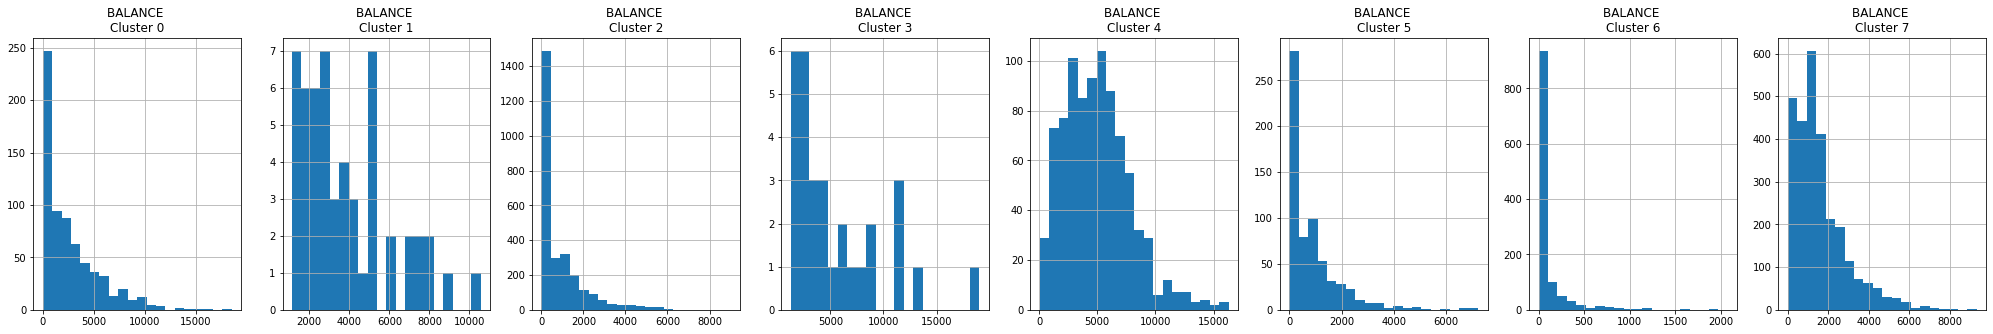

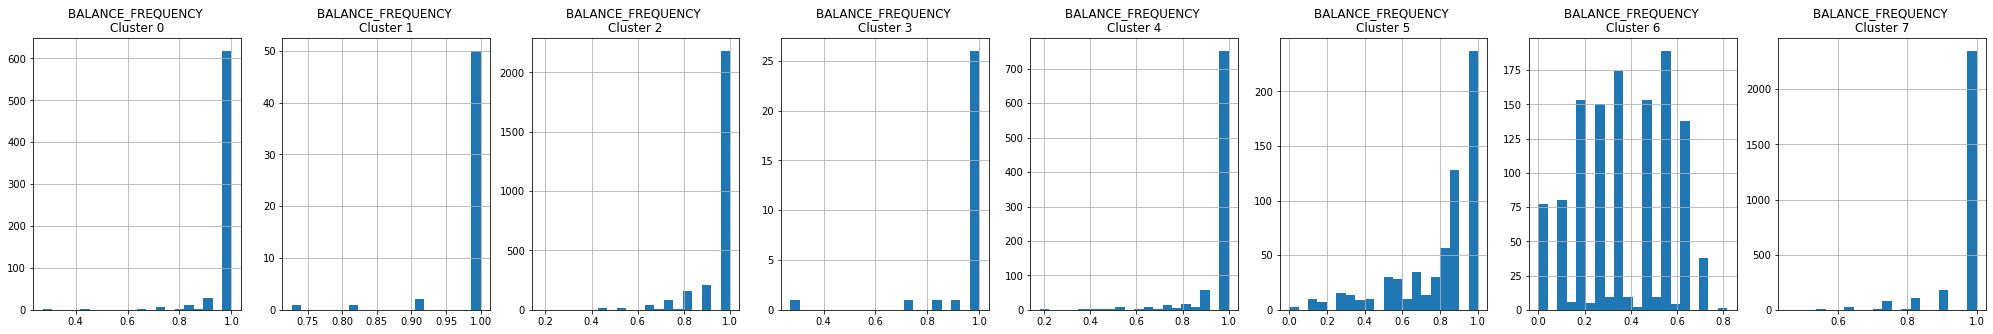

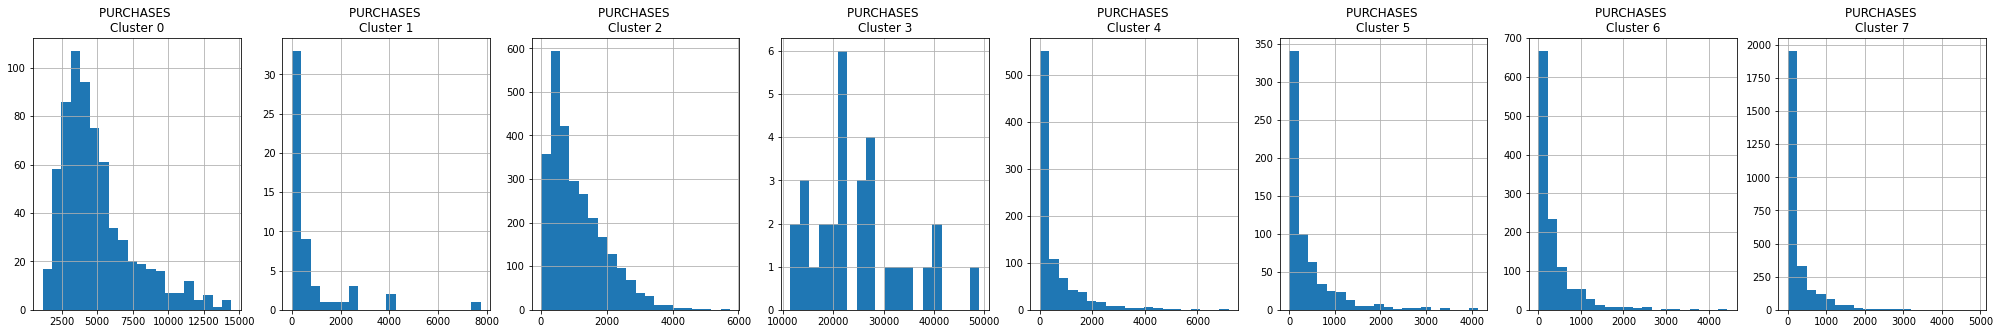

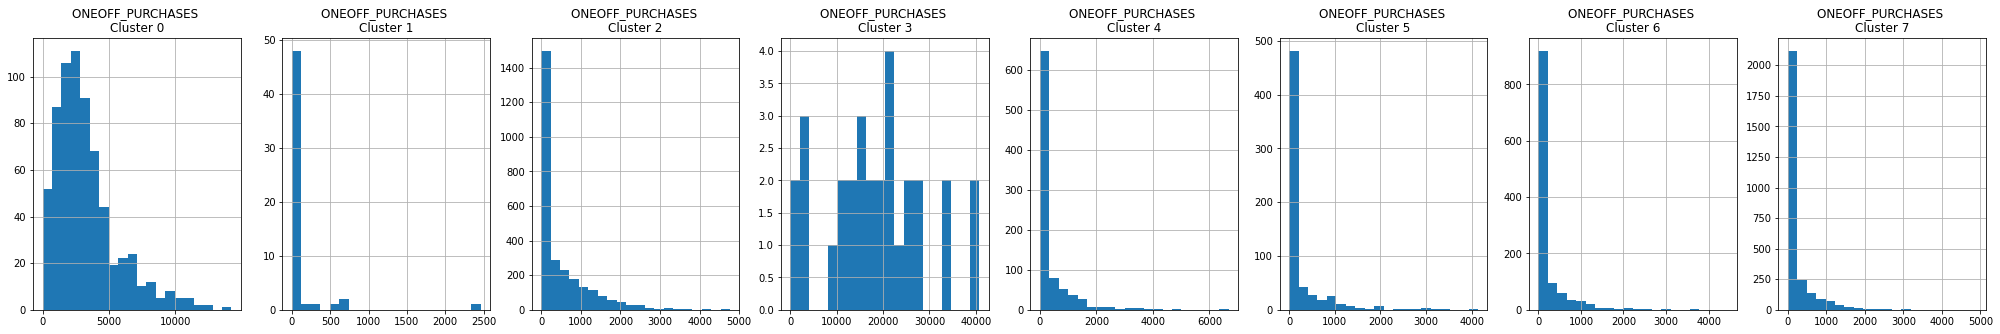

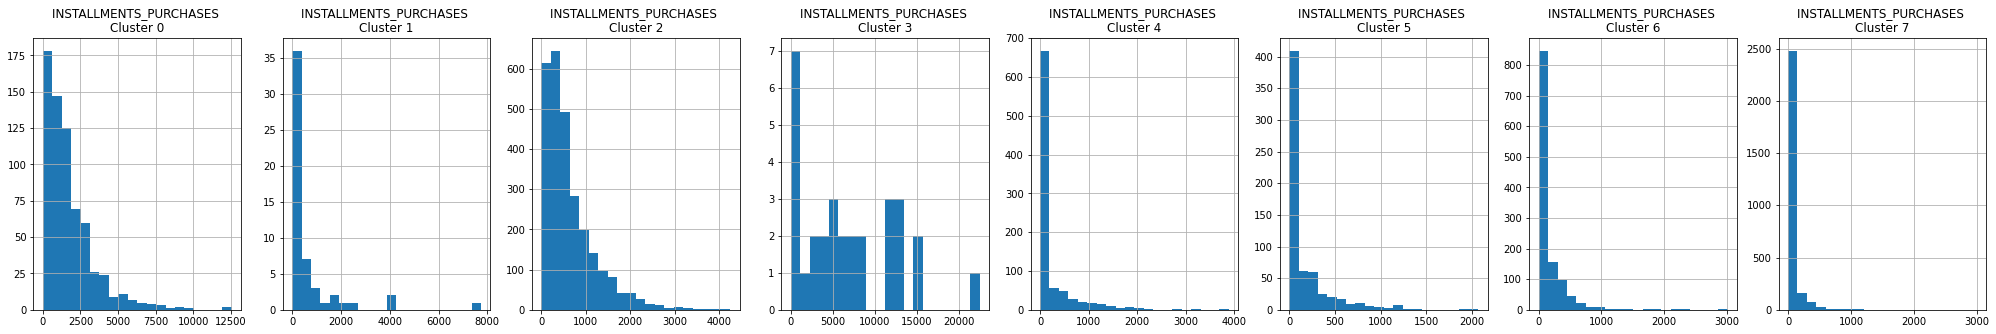

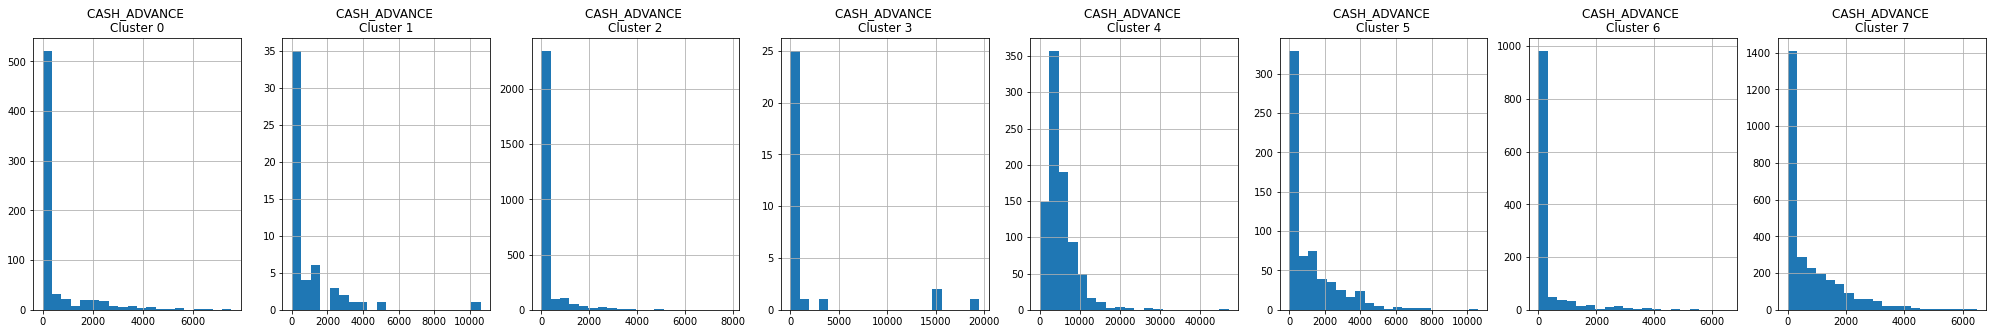

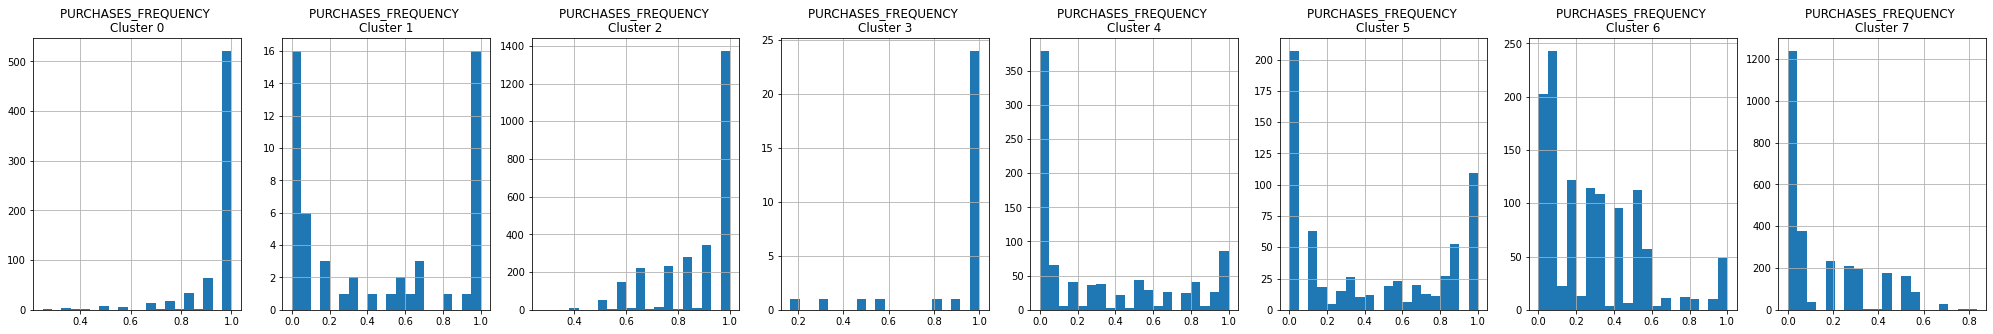

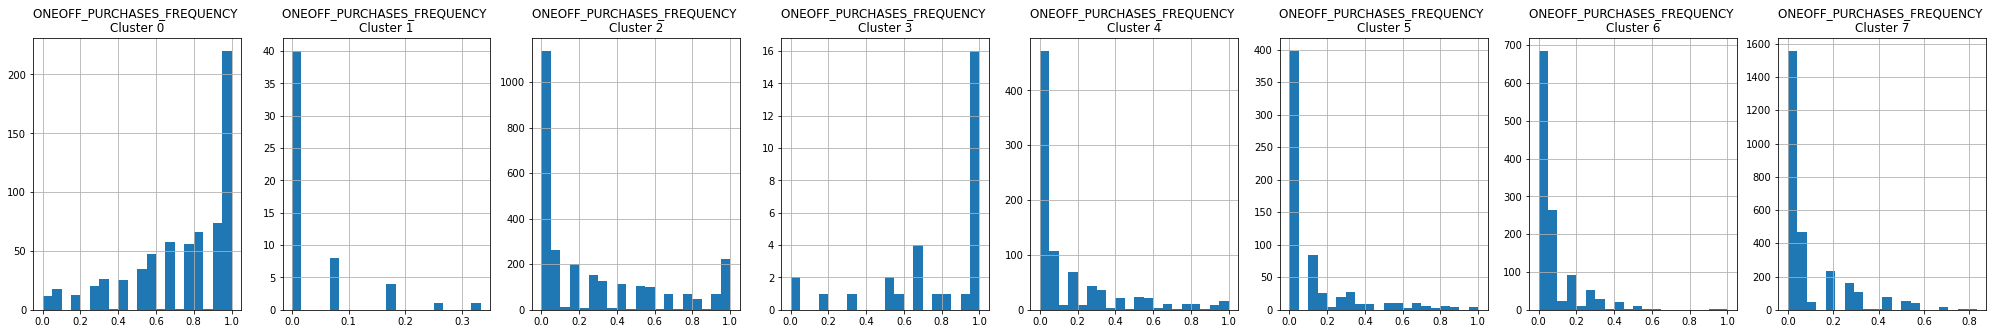

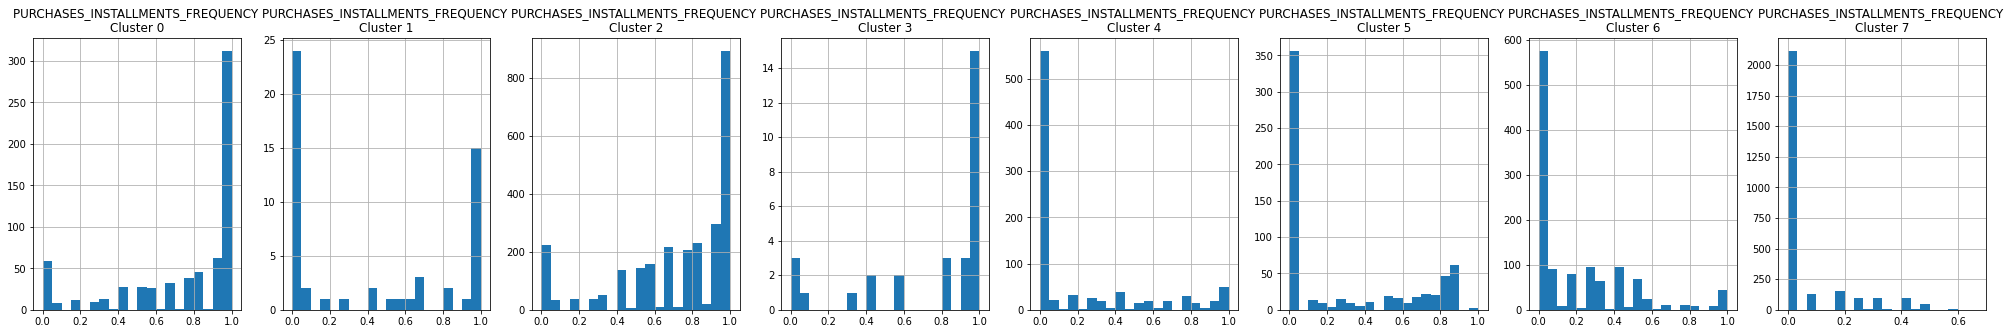

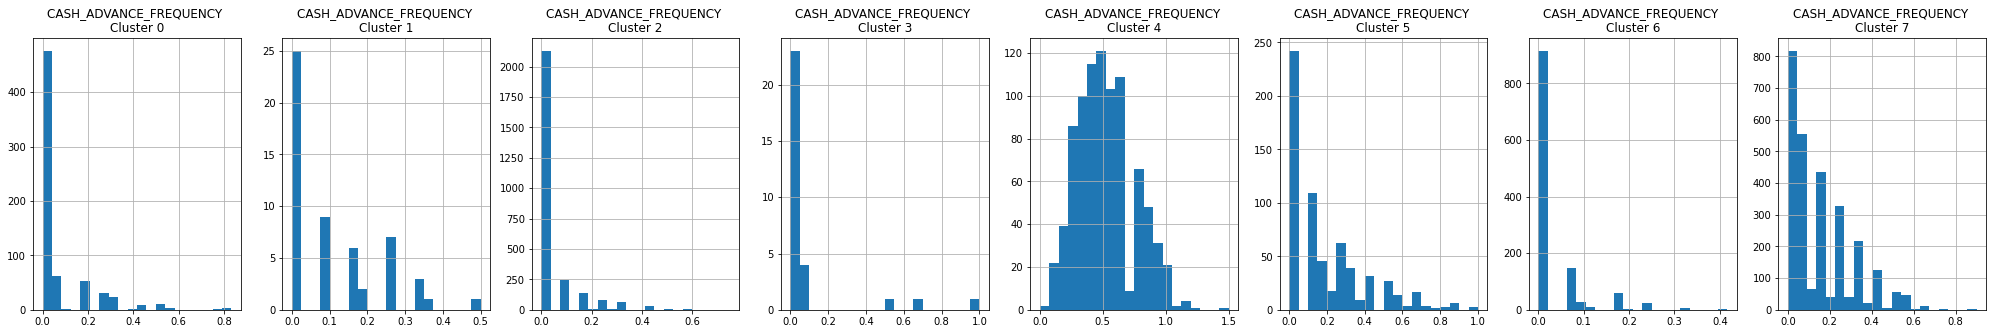

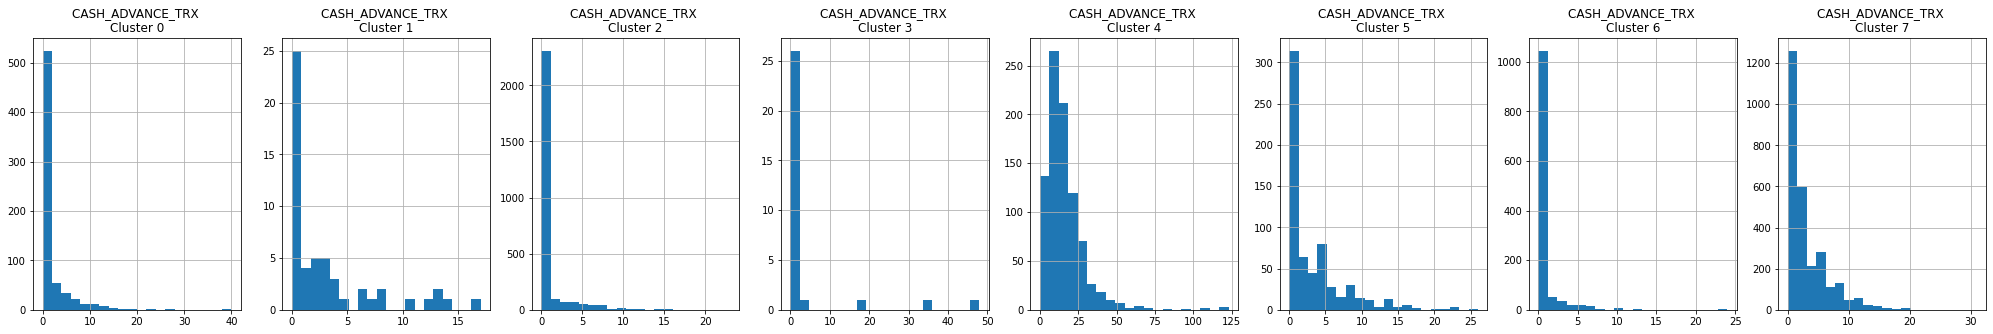

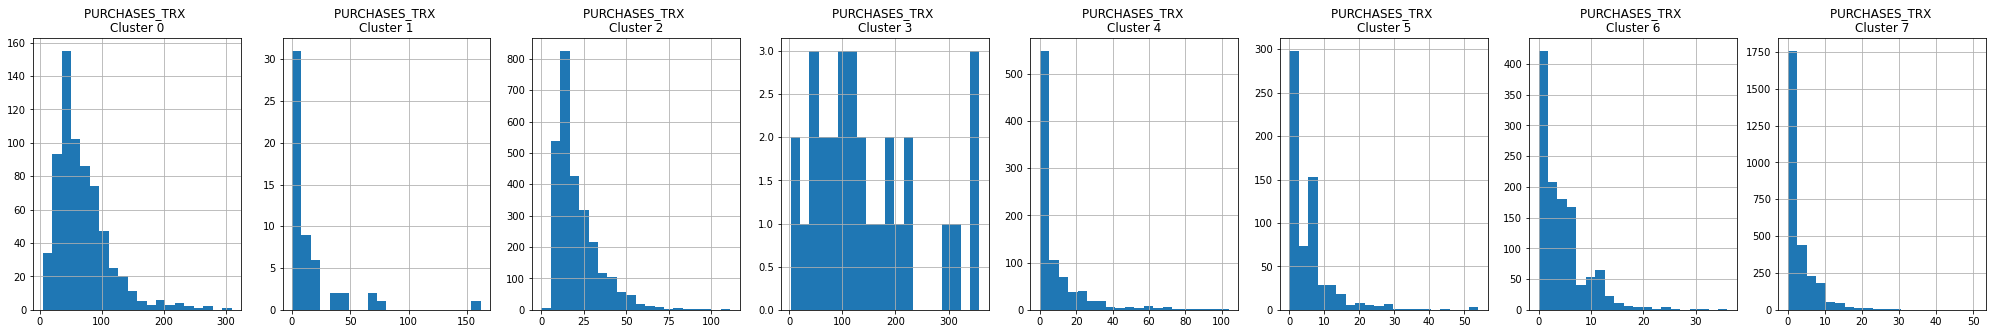

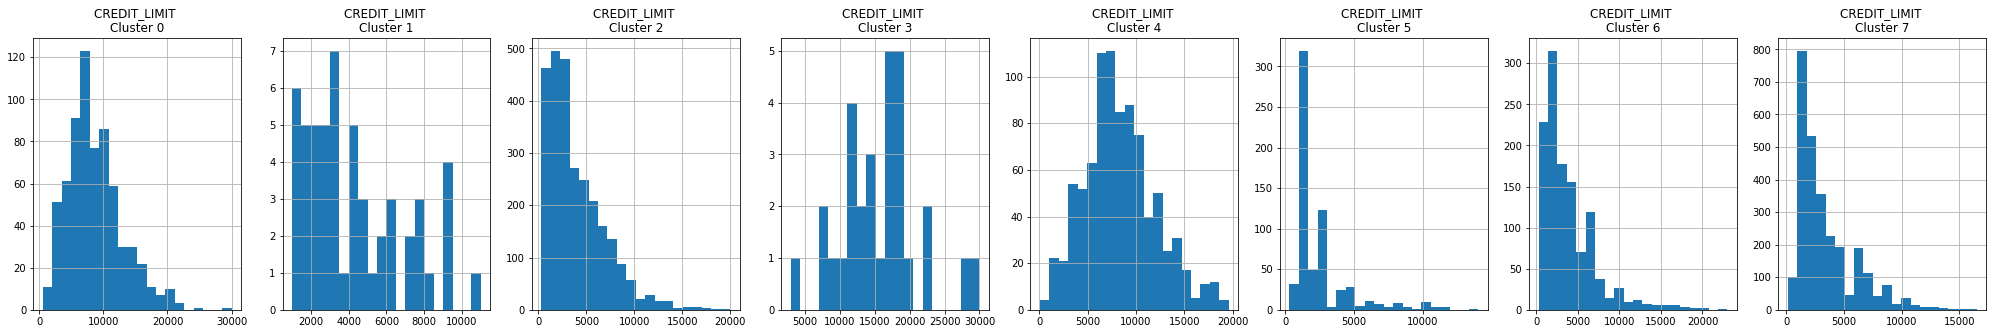

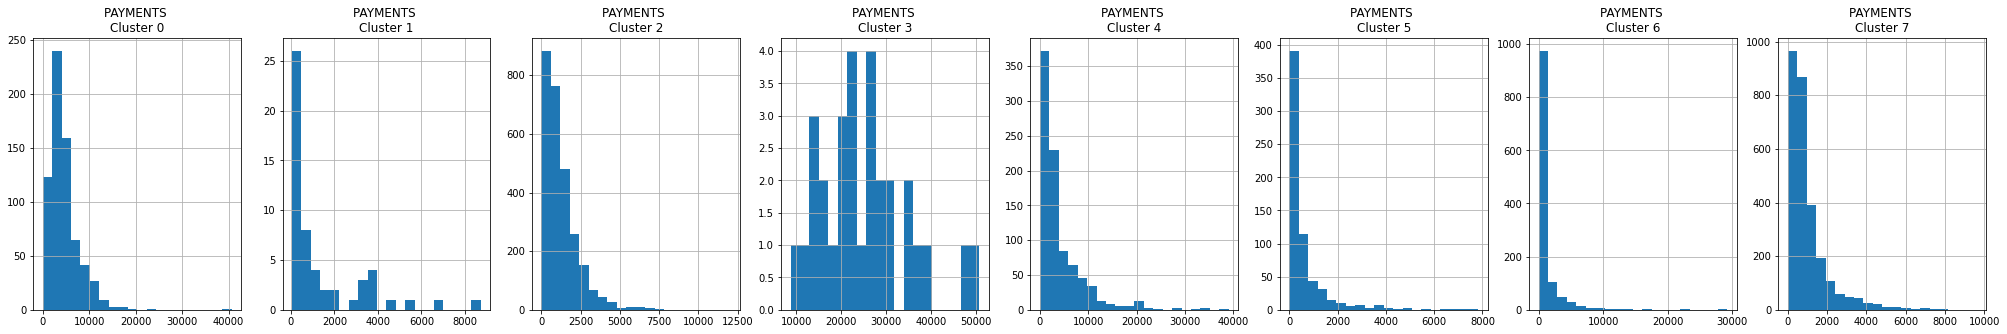

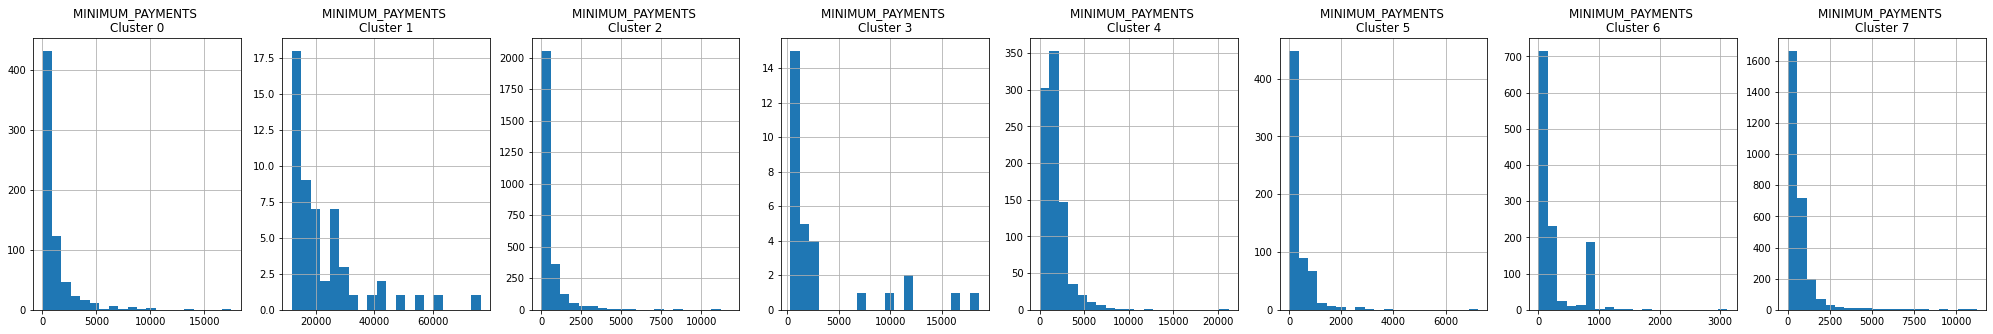

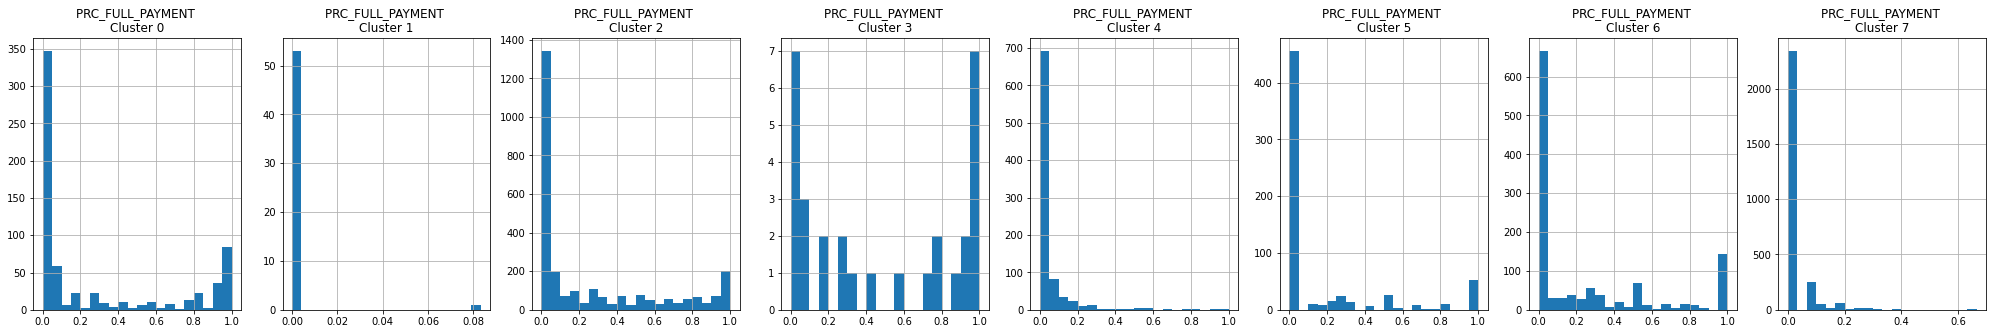

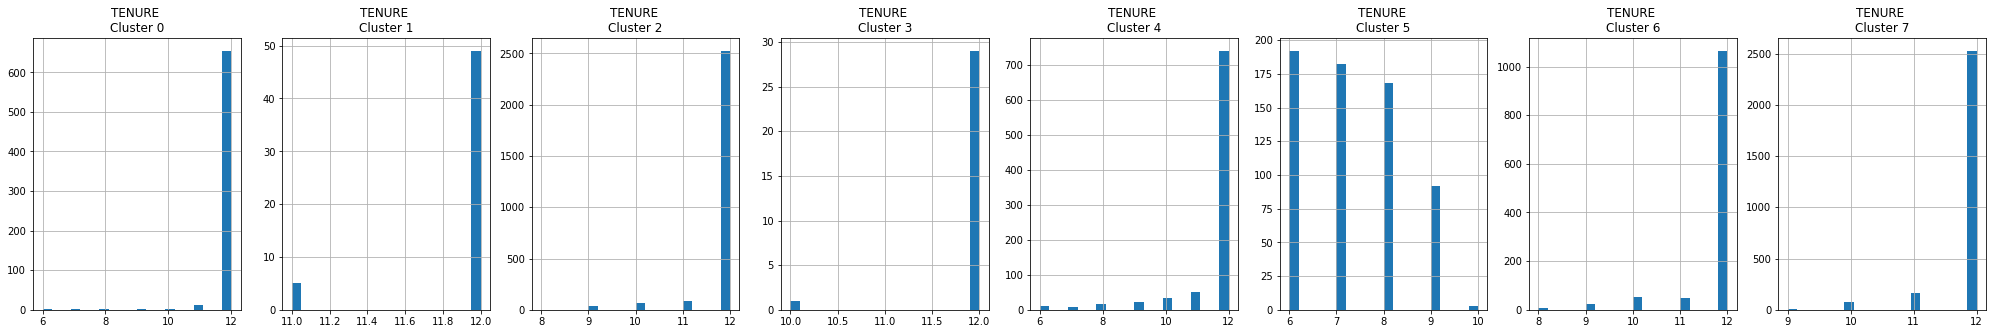

In [40]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [41]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1311,2415.412234,1.0,3313.65,1938.44,1375.21,843.735376,1.0,0.666667,1.000000,0.416667,10,55,8500.0,858.811070,582.753042,0.000000,12,0
565,4546.766836,1.0,3525.37,0.00,3525.37,0.000000,1.0,0.000000,1.000000,0.000000,0,66,15000.0,14083.968090,1442.933291,0.250000,12,0
3939,5643.992345,1.0,6141.58,5070.48,1071.10,1003.760024,1.0,0.916667,1.000000,0.333333,6,92,13000.0,11514.837560,1494.575739,0.000000,12,0
6038,204.166295,1.0,2630.52,1769.34,861.18,0.000000,1.0,0.750000,0.916667,0.000000,0,96,4000.0,2534.005357,176.114115,0.916667,12,0
1053,1389.598597,1.0,6058.03,3391.88,2666.15,3517.947740,1.0,0.166667,1.000000,0.250000,6,52,4000.0,6528.829703,550.971147,0.000000,12,0


In [42]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4591,1837.047378,1.000000,0.00,0.0,0.00,73.157833,0.000000,0.000000,0.0,0.083333,1,0,2000.0,412.848153,599.972398,0.000000,12,7
4587,3212.963003,1.000000,0.00,0.0,0.00,185.532602,0.000000,0.000000,0.0,0.083333,2,0,3500.0,766.728773,1044.358428,0.000000,12,7
4583,11.902047,0.818182,0.00,0.0,0.00,482.992567,0.000000,0.000000,0.0,0.083333,1,0,3000.0,727.929858,5.038210,0.142857,12,7
4603,992.615052,1.000000,162.28,0.0,162.28,0.000000,0.500000,0.000000,0.5,0.000000,0,6,1000.0,333.663574,462.345834,0.000000,12,7
4474,5256.695330,1.000000,188.60,188.6,0.00,1934.418697,0.083333,0.083333,0.0,0.333333,4,1,9000.0,1421.954639,1452.249653,0.000000,12,7


In [43]:
credit_ordered.to_csv('cluster.csv')

# **Aplicação de PCA**

In [44]:
pca = PCA(n_components=2)

In [45]:
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222197, -1.07642787],
       [-1.1382934 ,  2.5064861 ],
       [ 0.96968693, -0.38353995],
       ...,
       [-0.92620524, -1.81077175],
       [-2.33656004, -0.65790435],
       [-0.55642303, -0.40048172]])

In [46]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682222,-1.076428
1,-1.138293,2.506486
2,0.969687,-0.383540
3,-0.873628,0.043184
4,-1.599436,-0.688558


In [47]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682222,-1.076428,7
1,-1.138293,2.506486,4
2,0.969687,-0.383540,2
3,-0.873628,0.043184,7
4,-1.599436,-0.688558,7


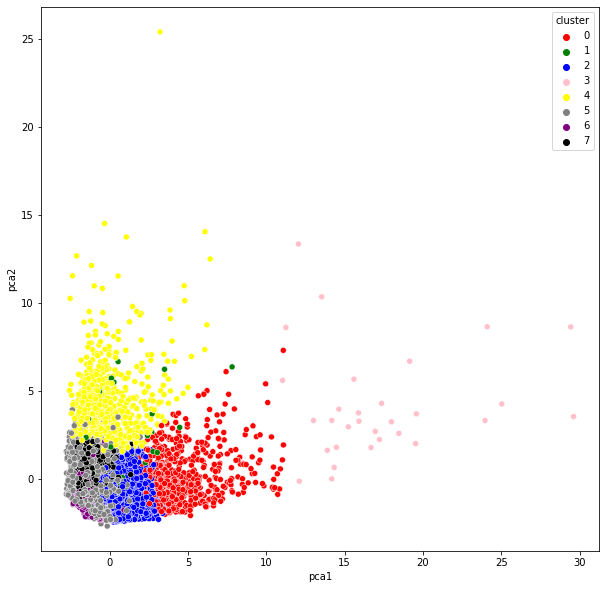

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue='cluster', data=pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

# **Autoencoders**

In [49]:
creditcard_df_scaled.shape

(8950, 17)

In [50]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [58]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)
x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [59]:
autoencoder = Model(input_df, decoded)

In [60]:
encoder = Model(input_df, encoded)

In [61]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [62]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs=50)

Epoch 1/50
280/280 [==============================] - 13s 43ms/step - loss: 0.2000
Epoch 2/50
280/280 [==============================] - 11s 40ms/step - loss: 0.0681
Epoch 3/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0602
Epoch 4/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0556
Epoch 5/50
280/280 [==============================] - 11s 38ms/step - loss: 0.0467
Epoch 6/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0350
Epoch 7/50
280/280 [==============================] - 12s 42ms/step - loss: 0.0389
Epoch 8/50
280/280 [==============================] - 11s 40ms/step - loss: 0.0323
Epoch 9/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0447
Epoch 10/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0235
Epoch 11/50
280/280 [==============================] - 11s 40ms/step - loss: 0.0274
Epoch 12/50
280/280 [==============================] - 12s 43ms/step - loss: 0.0282
E

In [63]:
creditcard_df_scaled.shape

(8950, 17)

In [64]:
compact = encoder.predict(creditcard_df_scaled)

In [65]:
compact.shape

(8950, 10)

In [66]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [69]:
compact[0]

array([0.1705052 , 0.9757509 , 0.04265942, 0.51484406, 0.02703133,
       0.        , 0.        , 0.5544224 , 0.5649508 , 0.56502795],
      dtype=float32)

In [70]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

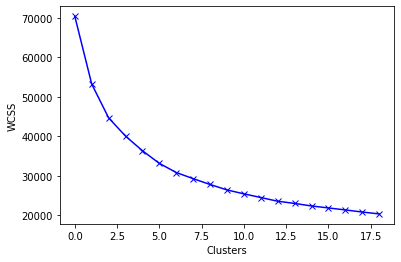

In [71]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

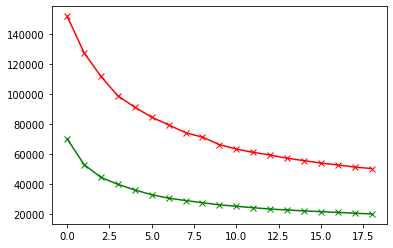

In [72]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g')

In [74]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [76]:
labels = kmeans.labels_
labels, labels.shape

(array([2, 2, 0, ..., 0, 0, 0], dtype=int32), (8950,))

In [77]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [79]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.425656,-0.086859
1,0.122294,1.325500
2,0.064332,-0.179467
3,0.141633,-0.158617
4,-1.578853,-0.090521


In [80]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.425656,-0.086859,2
1,0.122294,1.325500,2
2,0.064332,-0.179467,0
3,0.141633,-0.158617,0
4,-1.578853,-0.090521,2


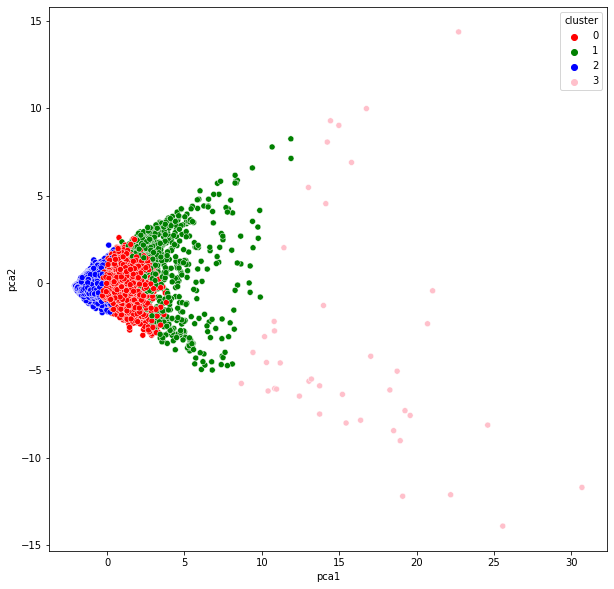

In [82]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue='cluster', data=pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [84]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')

In [85]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1641,3454.094319,1.000000,31299.35,19064.30,12235.05,0.0,1.000000,0.666667,0.833333,0.0,0,121,7500.0,22542.58705,1193.031030,0.583333,12,3
941,2072.457624,1.000000,17409.21,11263.17,6146.04,0.0,1.000000,1.000000,1.000000,0.0,0,175,19500.0,19517.16160,517.324081,0.333333,12,3
1256,4010.621974,1.000000,40040.71,24543.52,15497.19,0.0,1.000000,1.000000,1.000000,0.0,0,358,18000.0,33994.72785,703.503256,1.000000,12,3
7046,2980.054695,0.818182,26784.62,26514.32,270.30,0.0,0.583333,0.500000,0.083333,0.0,0,33,30000.0,30029.01496,11853.796130,0.750000,12,3
501,13479.288210,1.000000,41050.40,40624.06,426.34,0.0,0.833333,0.666667,0.416667,0.0,0,157,17000.0,36066.75068,15914.484620,0.083333,12,3


In [86]:
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,0
7111,1486.652099,1.000000,3670.46,2603.58,1066.88,371.312458,1.000000,0.750000,1.000000,0.250000,4,82,4000.0,1098.980289,912.345850,0.000000,12,0
3079,13.362018,0.363636,119.46,60.27,59.19,0.000000,0.250000,0.166667,0.083333,0.000000,0,4,7500.0,534.740352,132.441551,0.000000,12,0
3082,1939.822738,0.909091,1130.25,1130.25,0.00,1811.549006,0.583333,0.583333,0.000000,0.500000,20,29,3000.0,566.138250,970.417924,0.000000,12,0
7104,2.053676,0.181818,74.00,0.00,74.00,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,6000.0,68.147484,29.485897,0.090909,12,0


In [87]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
